In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import math
import seaborn as sns
from word2number import w2n


# PRACTISE 1
WITH 1 INDEPENDENT VARIABLE ONLY AREA

In [5]:
df=pd.read_csv("price.csv")
df

,Area,Price
0,1200,255000
1,1500,320000
2,1800,566000
3,2000,750000


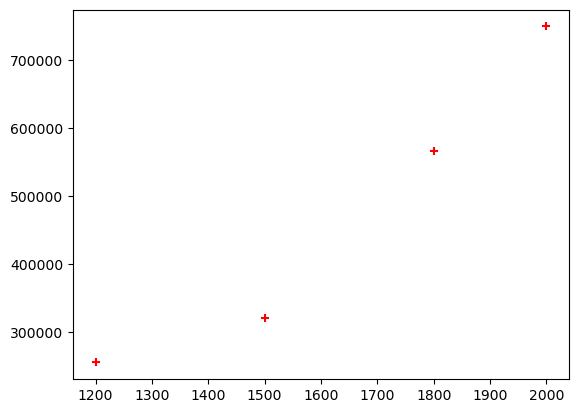

In [6]:
plt.scatter(df.Area , df['Price'], marker='+' , color='red')
plt.show()

In [7]:
reg=LinearRegression().fit(df[['Area']], df.Price)

In [8]:
reg.predict([[3300]]) #will generate warning 

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1529823.1292517])

In [31]:
reg.predict(pd.DataFrame([[3300]], columns=['Area'])) #will not generate warning

array([1529823.1292517])

In [32]:
reg.coef_

array([631.08843537])

# EXERCISE 1
FIND INCOME IN YEAR 2022

In [11]:
df1=pd.read_csv("canada_pci.csv")
df1.head(5)

,year,income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


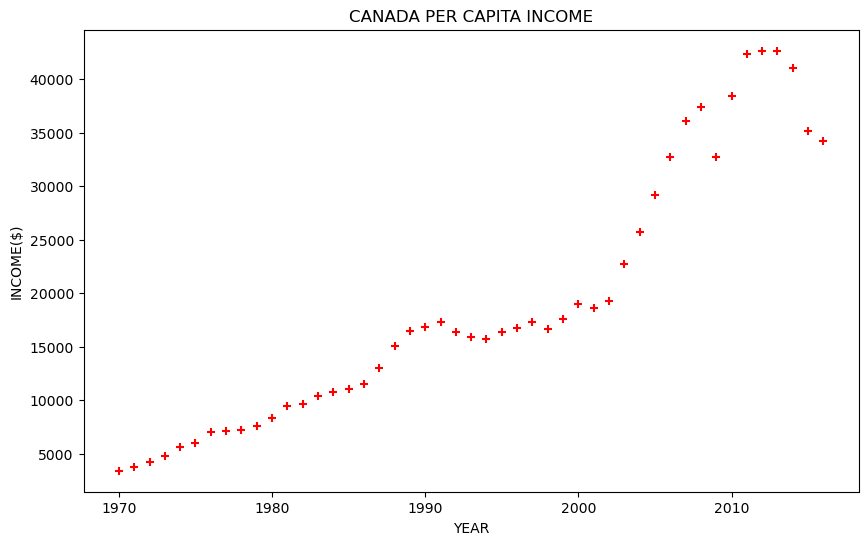

In [34]:
plt.figure(figsize=(10,6))
plt.scatter(df1.year , df1.income , marker='+' , color='red')
plt.title("CANADA PER CAPITA INCOME")
plt.ylabel("INCOME($)")
plt.xlabel("YEAR")
plt.show()

In [39]:
reg1=LinearRegression().fit(df1[['year']] , df1.income)

In [40]:
reg1.predict([[2022]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([42945.62424486])

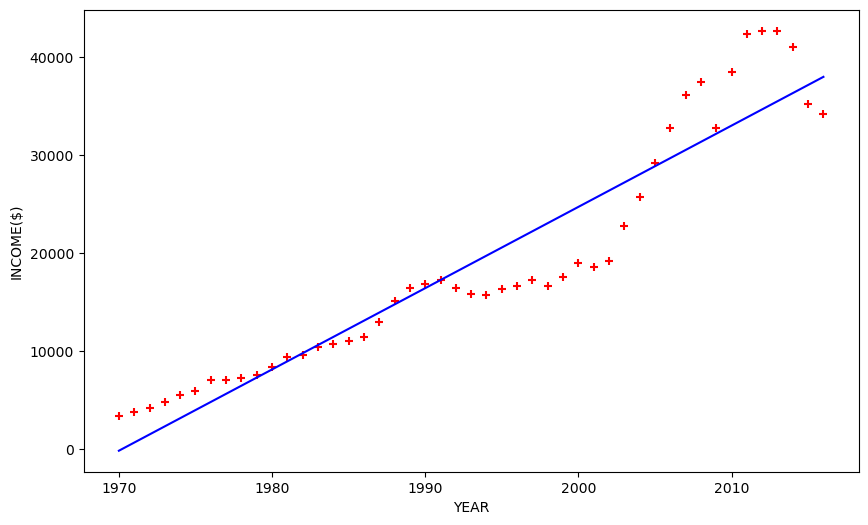

In [43]:
plt.figure(figsize=(10,6))
plt.ylabel("INCOME($)")
plt.xlabel("YEAR")
plt.scatter(df1.year , df1.income , marker='+' , color='red')
plt.plot(df1.year , reg1.predict(df1[['year']]) , color='blue')

# PRACTISE 2
WITH MANY INDEPENDENT VARIABLE

To find the price of home that has: \
3000 sqrft , 3 br , 40 age \
2500 sqrft , 4 br , 5 age

In [109]:
df2=pd.read_csv("area_price.csv")
df2.head(10)

,Area,Bedrooms,Age,Price
0,850,2.0,15,350000
1,1200,3.0,10,420000
2,1600,4.0,5,550000
3,2200,5.0,2,720000
4,1100,3.0,20,390000
5,900,NaN,25,320000
6,2400,5.0,2,750000
7,1800,4.0,4,520000
8,1300,3.0,12,440000
9,1500,4.0,3,600000


In [110]:
df2.isnull().sum()

Area        0
Bedrooms    1
Age         0
Price       0
dtype: int64

In [111]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Area      10 non-null     int64  
 1   Bedrooms  9 non-null      float64
 2   Age       10 non-null     int64  
 3   Price     10 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 452.0 bytes


In [112]:
df2['Bedrooms'] = df2['Bedrooms'].fillna(0).astype(int)

In [113]:
median=math.floor(df2.Bedrooms.median())
median

3

In [114]:
df2['Bedrooms']=df2['Bedrooms'].replace(0 , median)
df2.sample(10)

,Area,Bedrooms,Age,Price
2,1600,4,5,550000
4,1100,3,20,390000
6,2400,5,2,750000
0,850,2,15,350000
9,1500,4,3,600000
1,1200,3,10,420000
3,2200,5,2,720000
7,1800,4,4,520000
8,1300,3,12,440000
5,900,3,25,320000


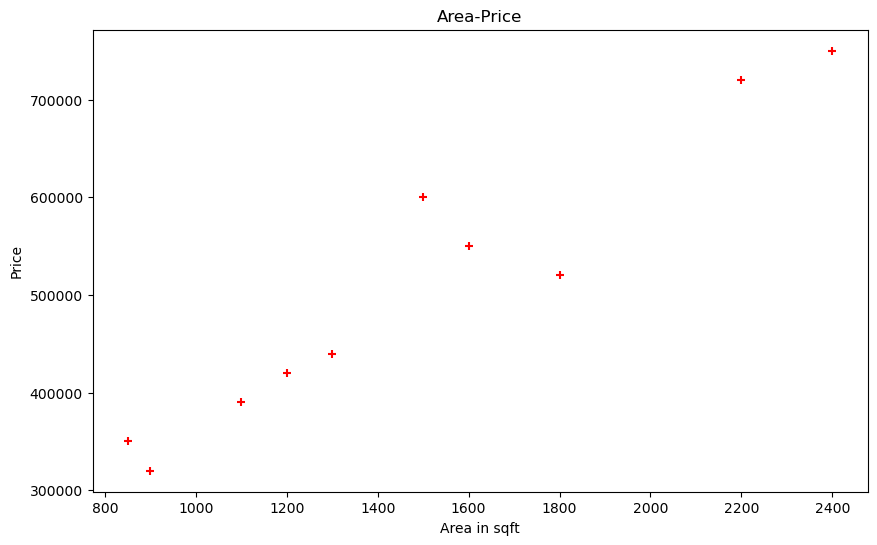

In [115]:
plt.figure(figsize=(10,6))
plt.scatter(df2.Area ,df2.Price , marker='+' , color='red')
plt.title("Area-Price")
plt.ylabel("Price")
plt.xlabel("Area in sqft")
plt.show()

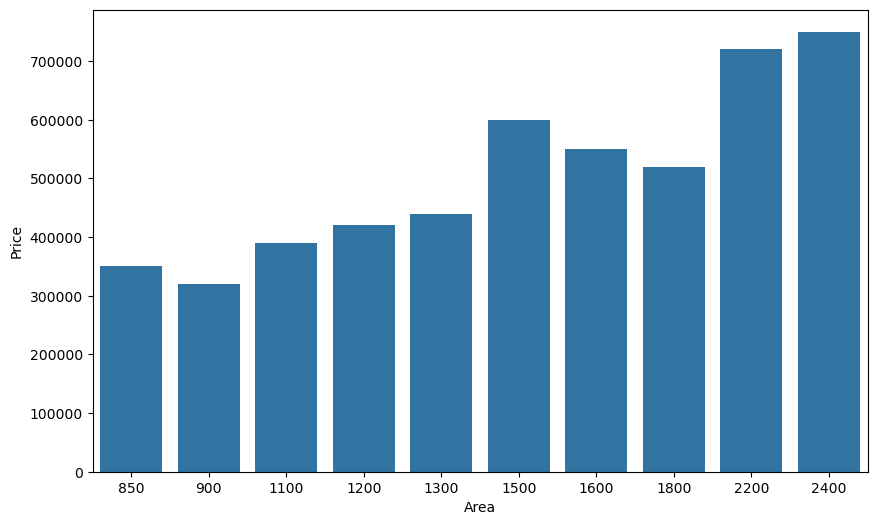

In [116]:
plt.figure(figsize=(10,6))
sns.barplot(x=df2.Area , y=df2.Price)
plt.show()

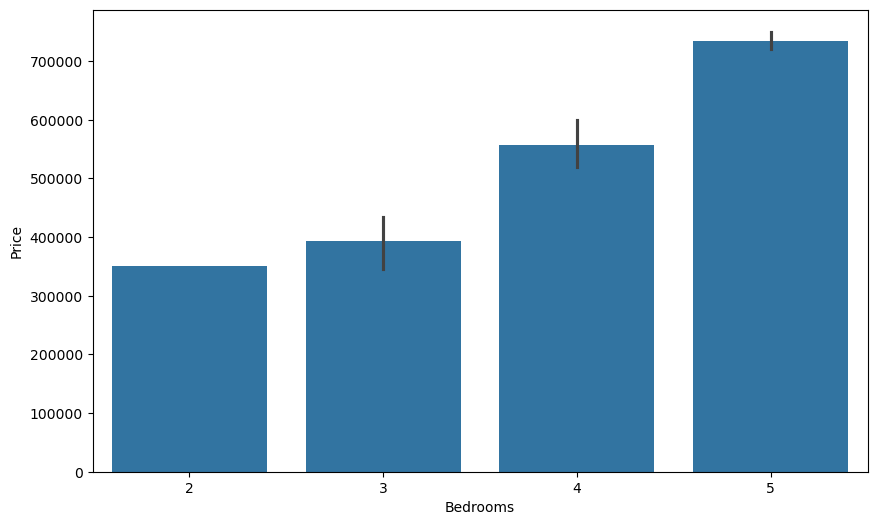

In [117]:
plt.figure(figsize=(10,6))
sns.barplot(x=df2.Bedrooms , y=df2.Price)
plt.show()

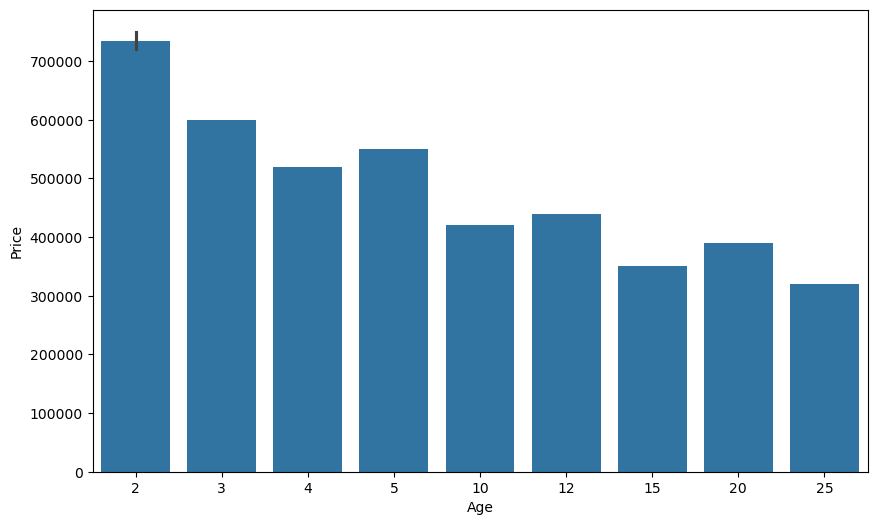

In [118]:
plt.figure(figsize=(10,6))
sns.barplot(x=df2.Age , y=df2.Price)
plt.show()

In [126]:
reg=LinearRegression().fit(df2[['Area' , 'Bedrooms' ,'Age']] , df2.Price)


In [127]:
reg.predict([[3000 , 3 ,40]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([482076.60356891])

# EXERCISE 2

PREDICT THE SALARY BASED OF GIVEN SCORES AND EXPERIENCE

In [3]:
df4 = pd.read_csv('hiring.csv')
df4

,experience,test_score(out of 10),interview_score(out of 10),salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


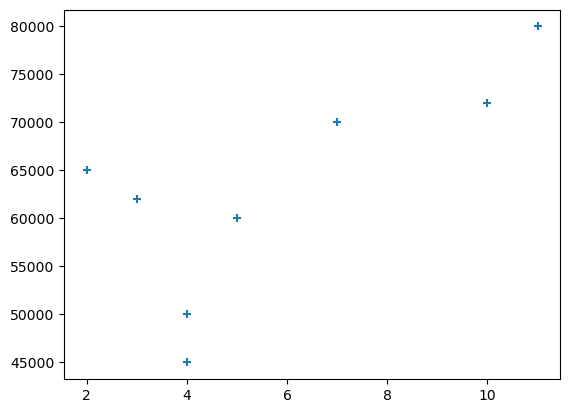

In [173]:
plt.scatter(df4.experience , df4.salary , marker='+')
plt.show()

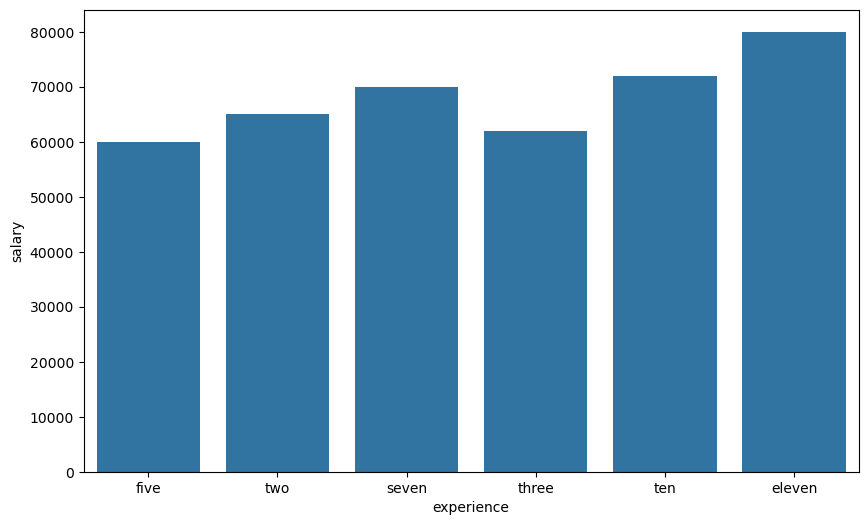

In [4]:
plt.figure(figsize=(10,6))
sns.barplot(x=df4.experience , y=df4.salary)
plt.show()

In [138]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   experience                  6 non-null      object 
 1   test_score(out of 10)       7 non-null      float64
 2   interview_score(out of 10)  8 non-null      int64  
 3   salary($)                   8 non-null      int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 388.0+ bytes


In [5]:
df4.isnull().sum()

experience                    2
test_score(out of 10)         1
interview_score(out of 10)    0
salary                        0
dtype: int64

In [6]:
df4['experience'] = df4['experience'].fillna(0)

In [7]:
df4['experience'] = df4['experience'].apply(lambda x: w2n.word_to_num(str(x)))

In [8]:
df4

,experience,test_score(out of 10),interview_score(out of 10),salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [9]:
median2=df4['experience'].median()
median2

4.0

In [10]:
df4['experience'] = df4['experience'].replace(0,median2)

In [11]:
df4

,experience,test_score(out of 10),interview_score(out of 10),salary
0,4,8.0,9,50000
1,4,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


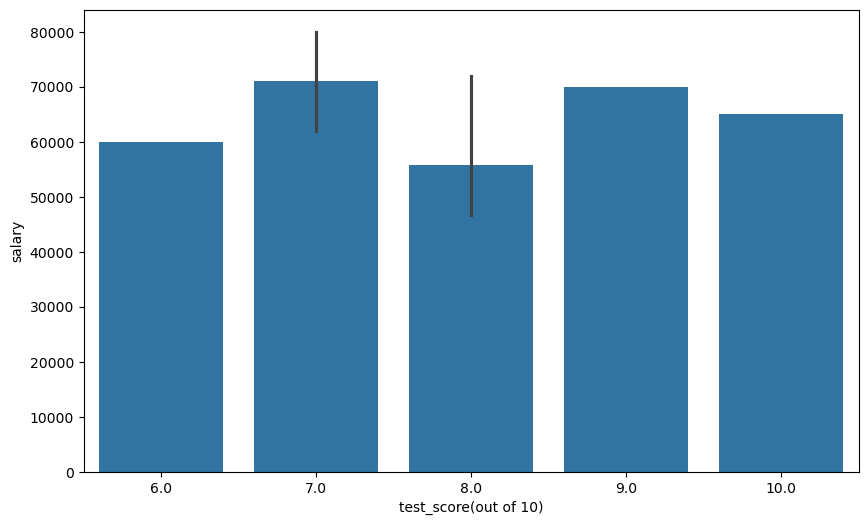

In [14]:
plt.figure(figsize=(10,6))
sns.barplot(x=df4['test_score(out of 10)'] , y=df4.salary)
plt.show()

In [12]:
median3=df4['test_score(out of 10)'].median()
df4['test_score(out of 10)'] = df4['test_score(out of 10)'].fillna(median3)

In [13]:
df4

,experience,test_score(out of 10),interview_score(out of 10),salary
0,4,8.0,9,50000
1,4,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [16]:
reg=LinearRegression().fit(df4[['experience' , 'test_score(out of 10)' , 'interview_score(out of 10)']] , df4.salary)

In [172]:
reg.predict([[2,9,6]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([46341.80249281])

In [18]:
reg.predict([[12,10,10]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([94792.77433975])

# PRACTICE 3

gradient_descent

In [2]:
df11=pd.read_csv('test_scores.csv')
df11.sample(5)

,name,math,cs
6,venkat,65,66
4,jeff,80,83
1,laura,56,68
3,wei,70,80
2,sanjay,88,81


In [3]:
def predict_mc():
    df11=pd.read_csv('test_scores.csv')
    reg=LinearRegression().fit(df11[['math']] , df11.cs)
    return reg.coef_, reg.intercept_

m_sk,c_sk = predict_mc()
print("the Coefficient is {} and intercept is {} ".format(m_sk , c_sk))

the Coefficient is [1.01773624] and intercept is 1.9152193111569176 


m -197.836, b -2.7960000000000003, cost 5199.1, iteration 0
m -37865.36787200001, b -534.3216319999999, cost 187320871.14020157, iteration 1
m -7209676.971514627, b -101734.75345126404, cost 6790621277383.52, iteration 2
m -1372706141.3947465, b -19370063.8074764, cost 2.461687524890214e+17, iteration 3
m -261360098084.23355, b -3688015678.9625387, cost 8.923933794410382e+21, iteration 4
m -49762362649406.73, b -702189718389.9891, cost 3.235040741841159e+26, iteration 5
m -9474639604868800.0, b -133695310306343.14, cost 1.1727438641384127e+31, iteration 6
m -1.8039496290519642e+18, b -2.5455280146928036e+16, cost 4.251347295526037e+35, iteration 7
m -3.434678678948845e+20, b -4.846626900179654e+18, cost 1.5411680572257842e+40, iteration 8
m -6.539549351954749e+22, b -9.227866349913185e+20, cost 5.586932366388107e+44, iteration 9
m -1.2451151832269756e+25, b -1.756964567846219e+23, cost 2.0253348179809908e+49, iteration 10
m -2.3706707237233999e+27, b -3.34522020108808e+25, cost 7.34209

C:\Users\DELL\AppData\Local\Temp\ipykernel_2700\2496047786.py:10: RuntimeWarning: overflow encountered in scalar power
  cost=(1/n)* sum([value**2 for value in (y-yi) ])


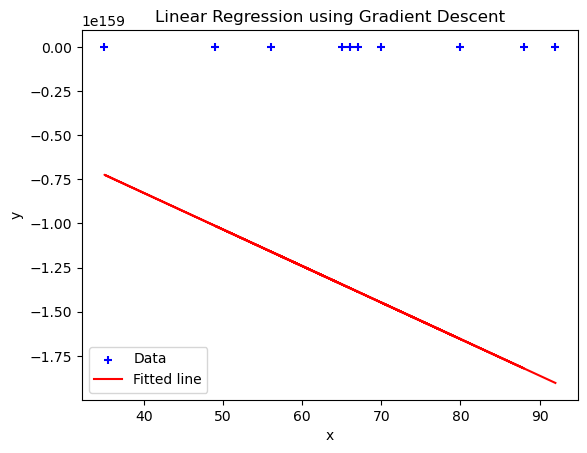

In [39]:
def gradient_descent_(x,y):
    m_cur=0
    c_cur=0
    n=len(x)
    iterations=1000
    learning_rate=0.02
    cost_p=0
    for i in range (iterations):
        yi=m_cur*x + c_cur
        cost=(1/n)* sum([value**2 for value in (y-yi) ])
        m_derivative=(2/n)*sum(x*(y-yi))
        c_derivative=(2/n)*sum(y-yi)
        m_cur=m_cur-learning_rate*m_derivative
        c_cur=c_cur-learning_rate*c_derivative
        if math.isclose(cost, cost_p, rel_tol=1e-20):
            break
        cost_p = cost
        print ("m {}, b {}, cost {}, iteration {}".format(m_cur,c_cur,cost, i))

    return m_cur, c_cur
    
x = np.array(df11.math)
y = np.array(df11.cs)

m, b = gradient_descent_(x,y)
print("Using gradient descent function: Coef {} Intercept {}".format(m, b))


plt.scatter(x, y, color='blue', label='Data' , marker='+')
plt.plot(x, m * x + b, color='red', label='Fitted line')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Linear Regression using Gradient Descent")
plt.show()

Epoch 0: Loss = 44.0000, w = 0.4400, b = 0.1200
Epoch 10: Loss = 0.2435, w = 1.7674, b = 0.4693
Epoch 20: Loss = 0.0430, w = 1.8609, b = 0.4774
Epoch 30: Loss = 0.0393, w = 1.8713, b = 0.4631
Epoch 40: Loss = 0.0367, w = 1.8759, b = 0.4478
Epoch 50: Loss = 0.0343, w = 1.8801, b = 0.4329
Epoch 60: Loss = 0.0321, w = 1.8841, b = 0.4185
Epoch 70: Loss = 0.0300, w = 1.8880, b = 0.4045
Epoch 80: Loss = 0.0280, w = 1.8917, b = 0.3911
Epoch 90: Loss = 0.0262, w = 1.8953, b = 0.3780
Epoch 100: Loss = 0.0245, w = 1.8988, b = 0.3655
Epoch 110: Loss = 0.0229, w = 1.9021, b = 0.3533
Epoch 120: Loss = 0.0214, w = 1.9054, b = 0.3415
Epoch 130: Loss = 0.0200, w = 1.9086, b = 0.3301
Epoch 140: Loss = 0.0187, w = 1.9116, b = 0.3192
Epoch 150: Loss = 0.0174, w = 1.9145, b = 0.3085
Epoch 160: Loss = 0.0163, w = 1.9174, b = 0.2982
Epoch 170: Loss = 0.0152, w = 1.9201, b = 0.2883
Epoch 180: Loss = 0.0142, w = 1.9228, b = 0.2787
Epoch 190: Loss = 0.0133, w = 1.9254, b = 0.2694
Epoch 200: Loss = 0.0124, w = 

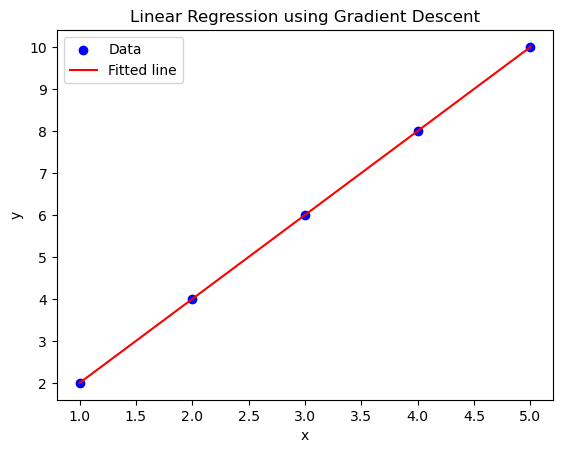

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Data
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10])

# Initialize parameters
w = 0.0  # weight
b = 0.0  # bias

# Hyperparameters
learning_rate = 0.01
epochs = 2350

# Store loss for plotting
loss_history = []

# Gradient descent loop
for epoch in range(epochs):
    y_pred = w * x + b
    error = y_pred - y
    loss = np.mean(error ** 2)
    loss_history.append(loss)
    
    # Compute gradients
    dw = (2/len(x)) * np.dot(error, x)
    db = (2/len(x)) * np.sum(error)
    
    # Update weights
    w -= learning_rate * dw
    b -= learning_rate * db
    
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.4f}, w = {w:.4f}, b = {b:.4f}")

# Final parameters
print(f"\nFinal model: y = {w:.2f}x + {b:.2f}")

# Plot
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, w * x + b, color='red', label='Fitted line')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Linear Regression using Gradient Descent")
plt.show()


# Using Pickle

using ex of model to find price of an area in PRACTICE 1

In [2]:
import pickle

In [10]:
with open('model_pickle' , 'wb') as f:
    pickle.dump(reg,f)

In [11]:
with open('model_pickle' , 'rb') as f:
    mp=pickle.load(f)

In [13]:
mp.predict([[5000]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2602673.46938776])